# **Quel est l'impact des variations du cours du sucre sur l'action "The Coca-cola Company" ?**


**Modélisation univariée**
1. Choisissez deux séries temporelles au moins en motivant ce choix. Les séries doivent être disponibles pour la même
période et la même fréquence d’observation (annuelle, trimestrielle, mensuelle, hebdomadaire ou quotidienne). La
période d’observation, la fréquence, les sources des données doivent être reportées. Un minimum de 50 observations environ serait souhaitable pour obtenir des estimations suffisamment précises.
Il est demandé de choisir desséries corrigées des variationssaisonnières(CVS) pour les variables macroéconomiques.
2. Faites et commentez les représentations graphiques et les autocorrélogrammes simples et partiels des séries.
3. Appliquez la stratégie de test de racine unitaire à chaque série et indiquez la méthode de stationnarisation appropriée
pour chacune d’elle.
4. Pour l’une des séries, cherchez le modèle ARMA satisfaisant les conditions de validité.
5. Calculez les prévisions de la série modélisée sur les horizons de 1 à 3 en détaillant la méthode de calcul. Si nécessaire, calculez les prévisions de la série initiale non stationnarisée pour les horizons 1 à 3.

**Modélisation multivariée**

On considère maintenant le vecteur Xt de toutes les séries stationnarisées.
6. Estimez le modèle VAR ayant le nombre de retards optimal. La composante déterministe de ce VAR devra être
cohérente avec les conclusions de la question 4. Commentez les résultats des estimations.
7. Déterminez les relations de causalité entre les variables et commentez les résultats obtenus.
8. Effectuez et commentez une analyse impulsion-réponse des chocs sur les différentes variables par :
• la methode des VAR,
• la méthode des projections locales.
Vous justifierez votre choix pour l’ordre des variables dans la décomposition de Choleski.
9. Faites le test de cointégration de Johansen si les séries initiales sont intégrées d’ordre 1. Indiquez si les résultats du
test valident le modèle VAR. Proposez un modèle alternatif si vous le jugez nécessaire.

**Introduction**

L'industrie des boissons non alcoolisées occupe une place prépondérante dans le paysage économique mondial, et parmi les entreprises leaders de ce secteur, "The Coca-Cola Company" se distingue tant par son envergure que par son impact significatif sur les marchés financiers. En tant qu'entreprise emblématique, "The Coca-Cola Company" est exposée à divers facteurs susceptibles d'influencer sa performance boursière, parmi lesquels les fluctuations du cours des matières premières occupent une position cruciale.

Dans cette optique, notre projet d'économétrie se propose d'explorer de manière approfondie l'impact des variations du cours du sucre sur l'évolution de l'action de "The Coca-Cola Company". Le sucre, en tant qu'ingrédient essentiel dans la fabrication de nombreuses boissons de la société, représente une composante clé de son processus de production. Les variations de son coût peuvent ainsi avoir des répercussions substantielles sur les coûts de fabrication, la rentabilité et, par extension, sur la valorisation boursière de l'entreprise.

# Modélisation Univariée





Installation des packages.


In [ ]:
install.packages('ggplot2')
library(ggplot2)
install.packages('urca')
library(urca)
install.packages('forecast')
library('forecast')
install.packages('lmtest')
library(lmtest)
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Importation et visualisation des données

Nous allons importer nos données à partir de GitHub, ainsi les données sont accessibles à toutes les personnes voulant tester notre projet.

Nous importons les données mensuels du cours du sucre et de l'action "The Coca-Cola Company". Nous regardons les données du 11/2018 au 10/2023.

Nous les importons à l'aide de la commande read.cvs.


In [ ]:

coca<-read.csv("https://raw.githubusercontent.com/Milos191919/Projet/main/The%20coca-cola%20company.csv", sep=";")
sucre<-read.csv("https://raw.githubusercontent.com/Milos191919/Projet/main/cotations_ABCSB.csv", sep=";")



Nous créons un dataframe contenant uniquement les dates et la valeur des close pour les valeurs de l'action "The Coca-Cola Company" et celle du cours du sucre.

In [ ]:
df_coca <- coca[c("Date", "Close")]
df_sucre <- sucre[c("Date", "Close")]
head(df_coca)
head(df_sucre)

,Date,Close
,<chr>,<dbl>
1,01/11/2018,50.40
2,01/12/2018,47.35
3,01/01/2019,48.13
4,01/02/2019,45.34
5,01/03/2019,46.86
6,01/04/2019,49.06


,Date,Close
,<chr>,<chr>
1,15/10/2018,"13,19"
2,01/11/2018,"12,84"
3,03/12/2018,"12,03"
4,02/01/2019,"12,73"
5,01/02/2019,"12,78"
6,01/03/2019,"12,53"


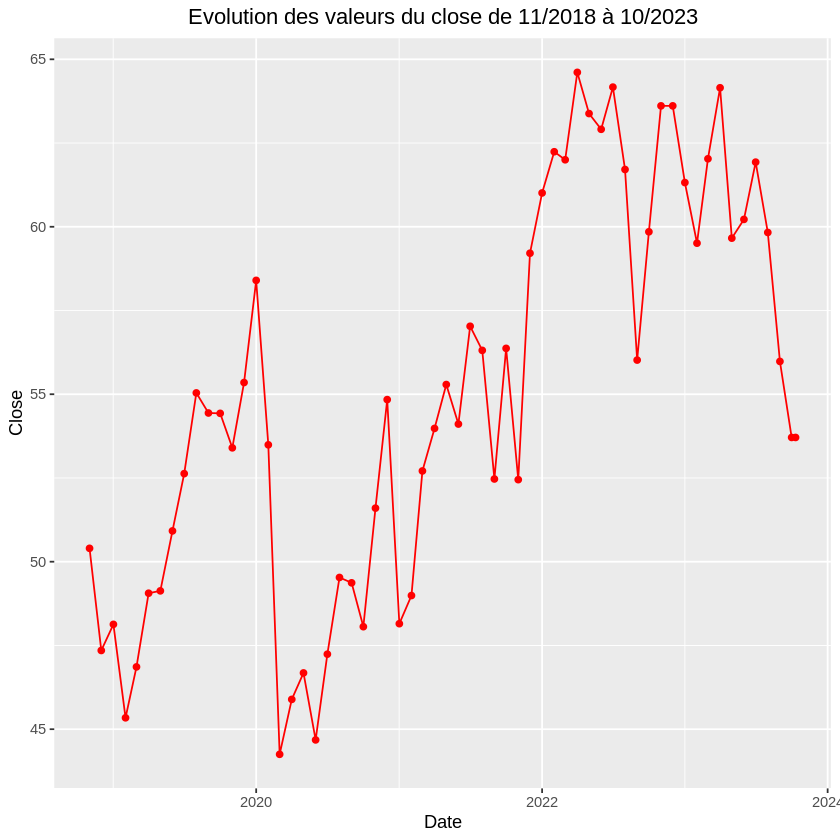

In [ ]:
Dates_coca<-as.Date(df_coca$Date, format = "%d/%m/%Y")
prix_action_coca<-as.numeric(gsub(",", ".", df_coca$Close))

p_coca<-ggplot(data=df_coca,aes(x=Dates_coca,y=Close))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Close')+ggtitle('Evolution des valeurs du close de 11/2018 à 10/2023')+theme(plot.title = element_text(hjust = 0.5))
p_coca

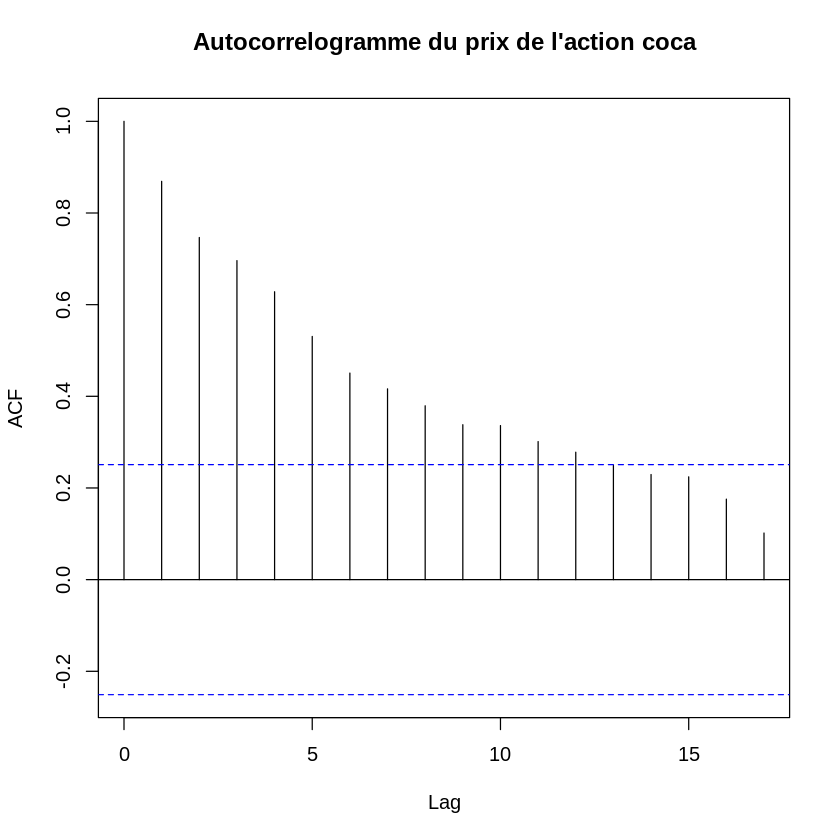

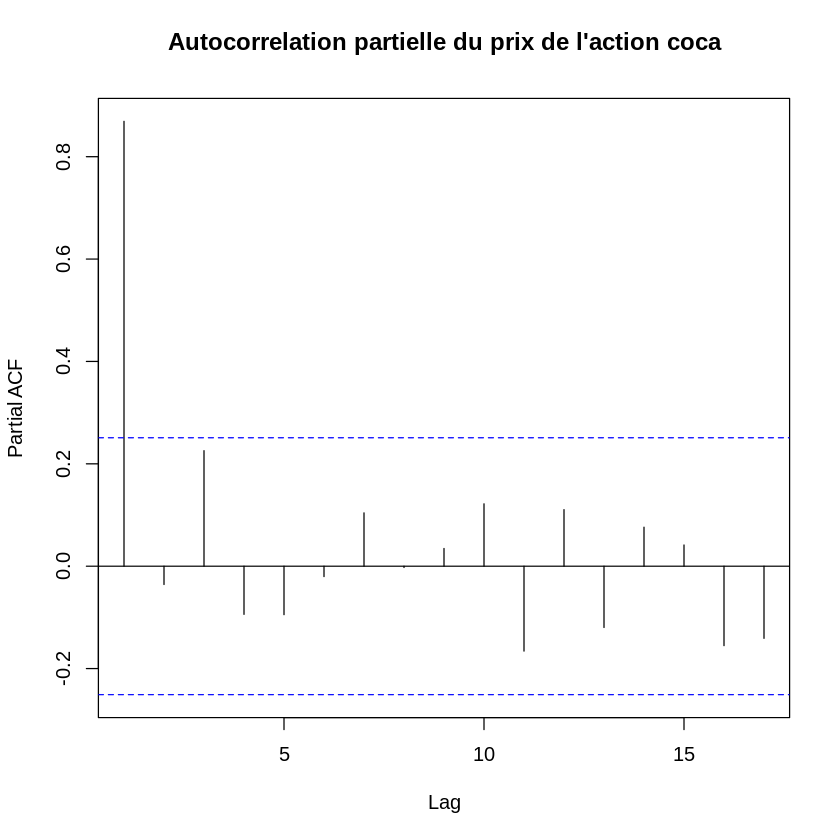

In [ ]:
acf(prix_action_coca, main="Autocorrelogramme du prix de l'action coca")
pacf(prix_action_coca, main ="Autocorrelation partielle du prix de l'action coca")

Nous pouvons observer que graphiquement, la série temporelle semble non-stationnaire. En effet, nous pouvons observer une tendance haussière apparaitre au cours du temps. Cependant nous pouvons noter une chute importante de la valeur du close début de l'année 2020. Début 2020, plusieurs facteurs ont contribué à la chute des actions de nombreuses entreprises, y compris "The Coca-Cola Company". La principale raison a été l'émergence de la pandémie de la COVID-19.
Nous observons également une baisse fin d'année 2023.

### Cours du sucre


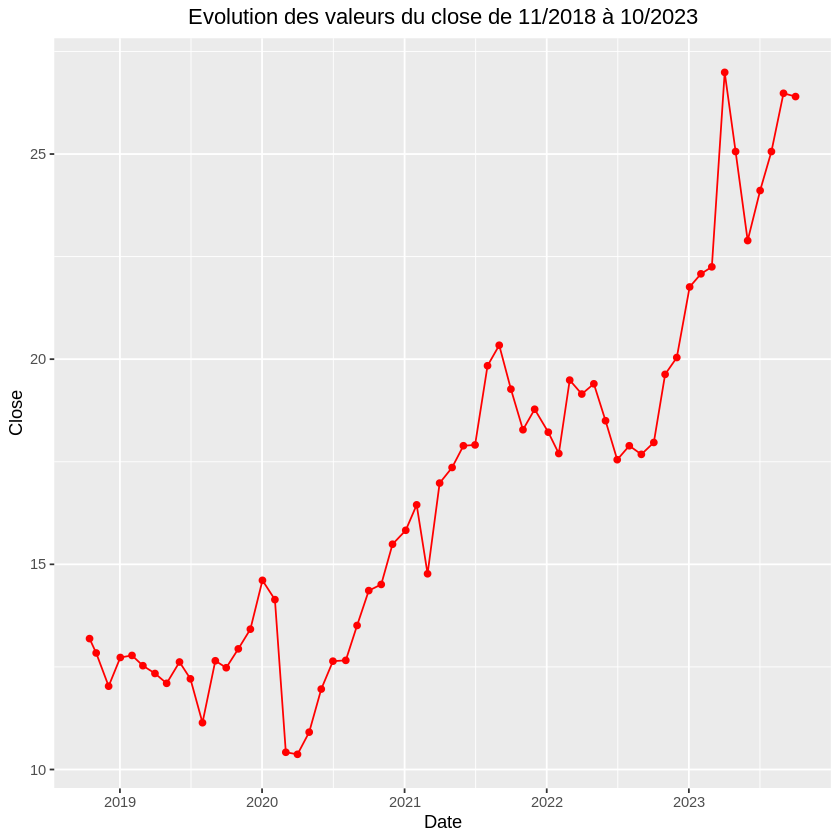

In [ ]:
Dates_sucre<-as.Date(df_sucre$Date, format = "%d/%m/%Y")
prix_sucre<-as.numeric(gsub(",", ".", df_sucre$Close))

p_sucre<-ggplot(data=df_sucre,aes(x=Dates_sucre,y=prix_sucre))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Close')+ggtitle('Evolution des valeurs du close de 11/2018 à 10/2023')+theme(plot.title = element_text(hjust = 0.5))
p_sucre


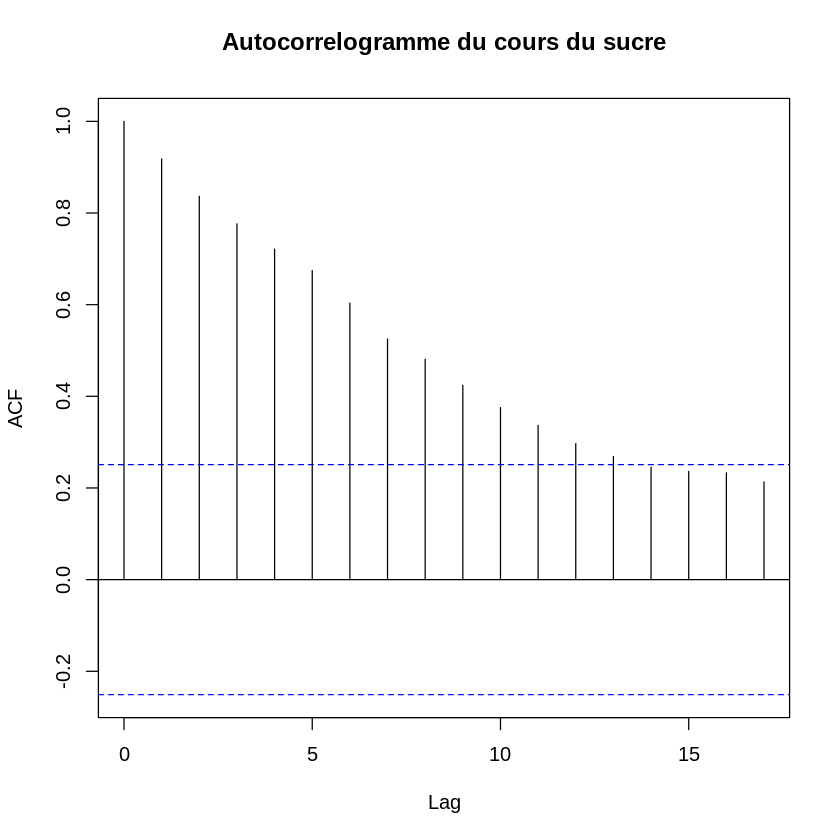

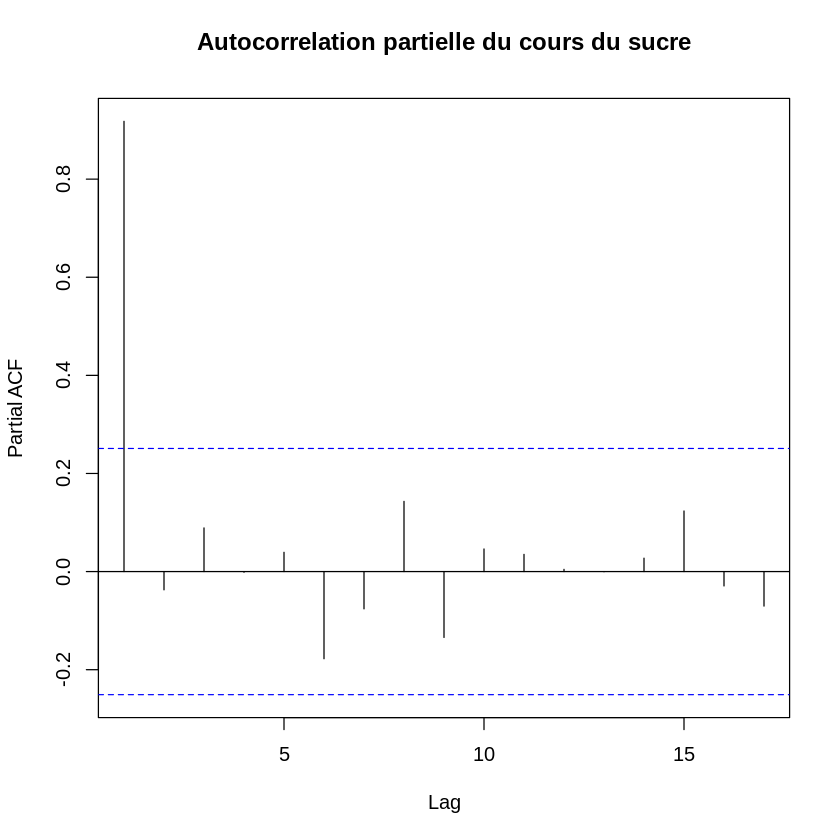

In [ ]:
acf(prix_sucre, main="Autocorrelogramme du cours du sucre")
pacf(prix_sucre, main ="Autocorrelation partielle du cours du sucre")

Nous pouvons observer graphiquement que la série temporelle croit régulièrement au cours du temps, la tendance est haussière. Nous voir que les autocorrélations simples décroient vers 0. Concernant les autocorrélations partielles seul le premier terme est significatif. La série semble clairement non-stationnaire.

## Appliquons la stratégie de test de racine unitaire à chaque série et indiquez la méthode de stationnarisation appropriée

Pour les tests de Dickey-Fuller (simple et augmenté), notre taille d'échantillon étant égale à 61, nous allons choisir n=50 lorsque nous lirons la table des lois de statistiques de Dickey Fuller.

On utilise la librairie [urca](https://cran.r-project.org/web/packages/urca/index.html) pour faire les tests de racine unitaire.

### Cours du sucre

####Test ADF avec constante et tendance déterministe

On applique le test ADF avec une tendance déterministe. Le nombre de retards maximum est fixé à 10 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

In [ ]:
adf1<-ur.df(y = prix_sucre,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4042 -0.7107  0.0279  0.6143  4.3089 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.44078    1.02407   2.383   0.0213 *
z.lag.1     -0.29346    0.11456  -2.562   0.0138 *
tt           0.08352    0.03235   2.581   0.0131 *
z.diff.lag   0.05710    0.14924   0.383   0.7038  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.226 on 46 degrees of freedom
Multiple R-squared:  0.137,	Adjusted R-squared:  0.08075 
F-statistic: 2.435 on 3 and 46 DF,  p-value: 0.07679


Value of test-statistic is: -2.5617 3.4447 3.432 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  4.16
phi3  8.

La statistique du test ADF est égale à $t_{ADF}=-2.5617$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}} = 2.383$. Le seuil de rejet qui figurent la table de $t_{\hat{b}}$ est égal à 3.18 pour un risque de première espèce de 5% et 50 observations. on a donc $\vert t_{\hat{b}} \vert = 1.983 <3.18$ : on ne peut pas rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative.


#### Test ADF avec constante

In [ ]:
adf2<-ur.df(y = prix_sucre,type=c("drift"), lag=10, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9135 -0.6588  0.0847  0.5812  4.4529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.441053   0.806747   0.547    0.587
z.lag.1     -0.003084   0.046169  -0.067    0.947
z.diff.lag1 -0.102817   0.148369  -0.693    0.492
z.diff.lag2 -0.211953   0.147377  -1.438    0.157

Residual standard error: 1.283 on 46 degrees of freedom
Multiple R-squared:  0.05453,	Adjusted R-squared:  -0.007134 
F-statistic: 0.8843 on 3 and 46 DF,  p-value: 0.4563


Value of test-statistic is: -0.0668 2.0975 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF est égale à $t_{ADF}=-0.0668$. Les seuils de rejet figurent sur la ligne tau2. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la constante est égal à $t_{\hat{c}} = 0.547$. Le seuil de rejet de la table de $t_{\hat{c}}$ est égal à 2.89 pour un risque de première espèce de 5% et T= 50  observations. on a donc $\vert t_{\hat{c}} \vert = 0.547<2.89$ : on ne peut pas rejeter l'hypothèse nulle que la contante n'est pas significative.



#### Test ADF sans constante ni tendance déterministe

In [ ]:
adf3<-ur.df(y = prix_sucre,type=c("none"), lag=10, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8099 -0.6279  0.1068  0.6976  4.3561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.02145    0.01078   1.989   0.0526 .
z.diff.lag1 -0.12109    0.14347  -0.844   0.4030  
z.diff.lag2 -0.22716    0.14364  -1.581   0.1205  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.273 on 47 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.04328 
F-statistic: 1.754 on 3 and 47 DF,  p-value: 0.1689


Value of test-statistic is: 1.9888 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


La statistique du test ADF est égale à $t_{ADF}=1.9888$. Les seuils de rejet figurent sur la ligne tau1. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire. On conclut que la série n'est pas stationnaire.

#### Conclusion


Les résultats des tests ADF nous amènent à conclure que le cours du sucre est une série UR sans tendance ni constante. On dit aussi qu'elle est un processus UR sans dérive.

#### Test de stationnarité de KPSS


On applique le test de stationnarité de KPSS. On présente les résultats du test avec une tendance déterministe. La représentation graphique du cours du sucre montre que la série pourrait être stationnaire autour d'une tendance déterministe.

In [ ]:
kpss_mu<-ur.kpss(y=prix_sucre,type="tau",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.17 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test KPSS avec une constante est égale à $LM_{KPSS} = 0.17$. Elle est supérieure au seuil de rejet à 5% : $$ 0.17>0.146$$
On rejette l'hypothèse nulle de stationnarité du cours du autour d'une tendance déterministe.

In [ ]:
kpss_mu<-ur.kpss(y=prix_sucre,type="mu",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.437 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Nous avons une stat de test égale à $LM_{KPSS}$ = 1.437 donc nous sommes supérieur à 0.463 qui est le seuil à 5% et 0.739 qui est est le seuil à 1% donc nous rejetons l'hypothèse nulle de stationnarité autour d'une constante.



#### Conclusion générale sur les test de racine unitaire et de stationnarité


Les tests ADF et KPSS rejettent tous la stationnarité du cours du sucre.

#### Stationnarisation de la série

Les précedents résulats nous ont permis de retenir le modèle 1 tel que : $$X_{t} \simeq I(1) \Rightarrow ΔX_{t} = ϵ_t$$

Ainsi pour stationnariser la série, nous allons différencier la série sur sa différence première. $$X_{t} \simeq I(1) \Rightarrow ΔX_{t} = Y_t$$




####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0461 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.2088 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


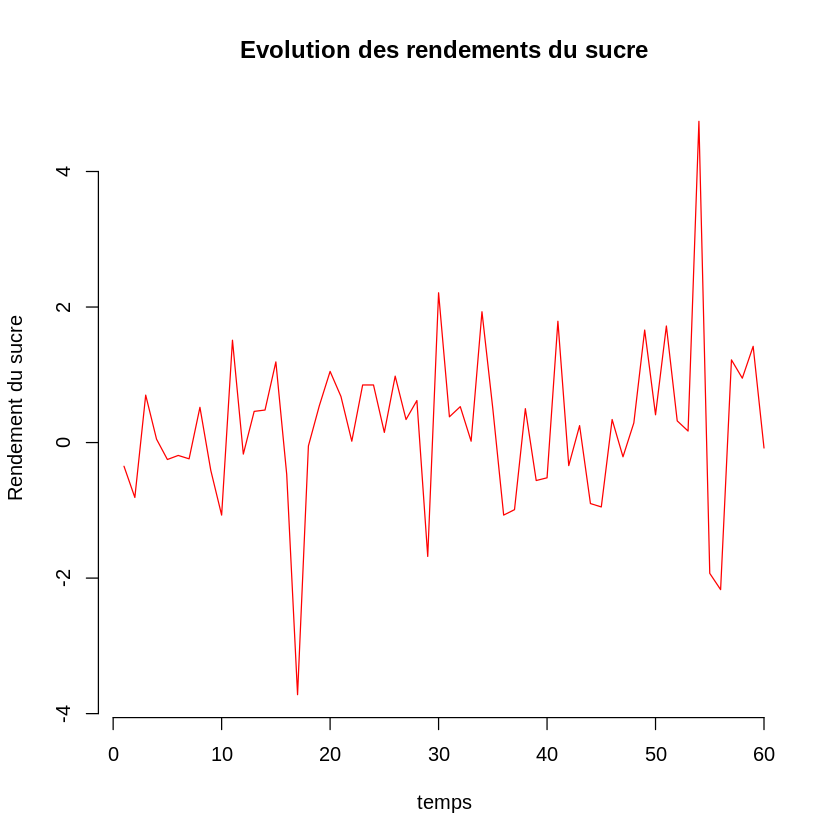

In [ ]:
diff1_prix_sucre<-diff(prix_sucre)

plot.ts(diff1_prix_sucre,main="Evolution des rendements du sucre",frame=F,
        xlab='temps',ylab='Rendement du sucre',col="red")

kpss_mu<-ur.kpss(y=diff1_prix_sucre,type="tau",lags="short")
summary(kpss_mu)

kpss_mu<-ur.kpss(y=diff1_prix_sucre,type="mu",lags="short")
summary(kpss_mu)


Les résultats des 2 tests KPSS nous confirment la stationnarité de notre série différencié. En effet, notre stat de test est inférieur à seuil de rejet donc nous ne rejettons pas notre hypothèse nulle de stationnarité.  

### Cours de l'action "The Coca-Cola Company"

On applique le test ADF avec une tendance déterministe. Le nombre de retards maximum est fixé à 10 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

####Test ADF avec constante et tendance déterministe

In [ ]:
adf1<-ur.df(y = prix_action_coca,type=c("trend"), lag=10, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1003 -1.7229  0.6423  2.0145  6.9701 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  9.51068    5.82654   1.632    0.110
z.lag.1     -0.19661    0.12420  -1.583    0.120
tt           0.04251    0.04571   0.930    0.357
z.diff.lag1  0.02513    0.15535   0.162    0.872
z.diff.lag2 -0.22644    0.15094  -1.500    0.141

Residual standard error: 2.997 on 45 degrees of freedom
Multiple R-squared:  0.1596,	Adjusted R-squared:  0.08487 
F-statistic: 2.136 on 4 and 45 DF,  p-value: 0.09185


Value of test-statistic is: -1.583 0.8991 1.3486 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  4.16
phi3  8.73  6.49  5.47


La statistique du test ADF est égale à $t_{ADF}=-1.583$. Les seuils de rejet figurent sur la ligne tau3. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la tendance déterministe est égal à $t_{\hat{b}} = 1.632$. Le seuil de rejet qui figurent la table de $t_{\hat{b}}$ est égal à 3.18 pour un risque de première espèce de 5% et 50 observations. on a donc $\vert t_{\hat{b}} \vert = 1.632 <3.18$ : on ne peut pas rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative.


#### Test ADF avec constante


In [ ]:
adf2<-ur.df(y = prix_action_coca,type=c("drift"), lag=10, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8292 -1.4034  0.7667  2.1043  7.3219 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  6.06660    4.49183   1.351    0.183  
z.lag.1     -0.10819    0.07982  -1.356    0.182  
z.diff.lag1 -0.03025    0.14327  -0.211    0.834  
z.diff.lag2 -0.27496    0.14143  -1.944    0.058 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.993 on 46 degrees of freedom
Multiple R-squared:  0.1434,	Adjusted R-squared:  0.08756 
F-statistic: 2.567 on 3 and 46 DF,  p-value: 0.06588


Value of test-statistic is: -1.3556 0.9188 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF est égale à $t_{ADF}=-1.3556$. Les seuils de rejet figurent sur la ligne tau2. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire.

Le t-stat de la constante est égal à $t_{\hat{c}} = 1.351$. Le seuil de rejet de la table de $t_{\hat{c}}$ est égal à 2.89 pour un risque de première espèce de 5% et T= 50  observations. on a donc $\vert t_{\hat{c}} \vert = 1.351<2.89$ : on ne peut pas rejeter l'hypothèse nulle que la contante n'est pas significative.



#### Test ADF sans constante ni tendance déterministe

In [ ]:
adf3<-ur.df(y = prix_action_coca,type=c("none"), lag=10, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6379 -1.6352  0.6349  1.9135  7.7232 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
z.lag.1     -0.0008764  0.0075877  -0.116   0.9085  
z.diff.lag1 -0.0878934  0.1379600  -0.637   0.5272  
z.diff.lag2 -0.3235375  0.1379777  -2.345   0.0233 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.019 on 47 degrees of freedom
Multiple R-squared:  0.1095,	Adjusted R-squared:  0.05263 
F-statistic: 1.926 on 3 and 47 DF,  p-value: 0.1383


Value of test-statistic is: -0.1155 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


La statistique du test ADF est égale à $t_{ADF}=-0.1155$. Les seuils de rejet figurent sur la ligne tau1. La statistique de test $t_{ADF}$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter l'hypothèse nulle de racine unitaire. On conclut que la série n'est pas stationnaire.

#### Conclusion

Les résultats des tests ADF nous amènent à conclure que le cours du sucre est une série UR sans tendance ni constante. On dit aussi qu'elle est un processus UR sans dérive.

#### Test de stationnarité KPSS

In [ ]:
kpss_mu<-ur.kpss(y=prix_action_coca,type="tau",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.1232 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test KPSS avec une constante est égale à $LM_{KPSS} = 0.1232$. Elle est supérieure au seuil de rejet à 5% : $$ 0.1232 < 0.146$$
On accepte l'hypothèse nulle de stationnarité du cours du autour d'une tendance déterministe.

In [ ]:
kpss_mu<-ur.kpss(y=prix_action_coca,type="mu",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.0726 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Nous avons une stat de test égale à $LM_{KPSS}$ = 1.0726 donc nous sommes supérieur à 0.463 qui est le seuil à 5% et 0.739 qui est est le seuil à 1% donc nous rejetons l'hypothèse nulle de stationnarité autour d'une constante.



#### Conclusion générale sur les test de racine unitaire et de stationnarité


Les tests ADF rejettent la stationnarité du cours de l'action "The Coca-Cola Company". Cependant les tests de stationnarité KPSS nous indique que le cours de l'action serait stationnaire autour d'une tendance déterministe. Nous décidons cependant de concerver l'hypothèse de non stationnarité autour de la tendance comme nous l'indique le resultat du test ADF. En effet, nous avons un avantage comparatif dans la mesure ou l'ecart entre la statistique de test et la règle de decision est bien supérieur dans le test ADF. De plus, graphiquement nous pouvons voir que certes nous avons une tendance haussière, mais la série ne semble pas être stationnaire. Notamment pour des raisons de variance.



#### Stationnarisationd de la série

Les précedents résulats nous ont permis de retenir le modèle 1 tel que : $$X_{t} \simeq I(1) \Rightarrow ΔX_{t} = ϵ_t$$

Ainsi pour stationnariser la série, nous allons différencier la série sur sa différence première. $$X_{t} \simeq I(1) \Rightarrow ΔX_{t} = Y_t$$


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0847 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.1039 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


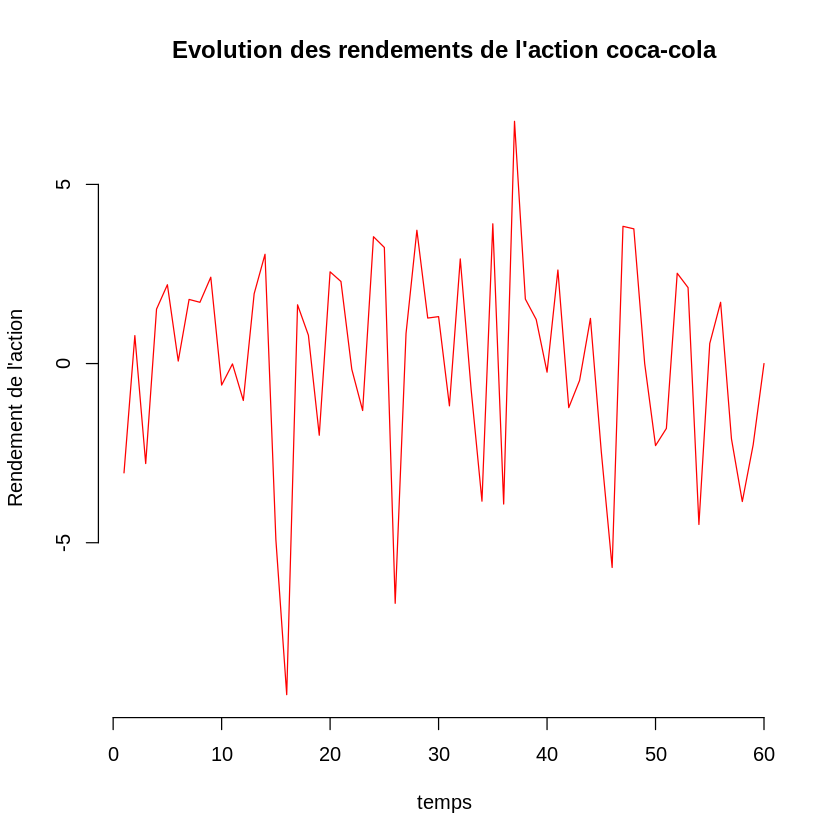

In [ ]:
diff1_prix_coca<-diff(prix_action_coca)

plot.ts(diff1_prix_coca,main="Evolution des rendements de l'action coca-cola",frame=F,
        xlab='temps',ylab="Rendement de l'action",col="red")

kpss_mu<-ur.kpss(y=diff1_prix_coca,type="tau",lags="short")
summary(kpss_mu)

kpss_mu<-ur.kpss(y=diff1_prix_coca,type="mu",lags="short")
summary(kpss_mu)


## Pour l’une des séries, cherchons le modèle ARMA ayant la meilleure spécification

Nous décidons de travailler sur la série des close pour l'action "The Coca-Cola Company".

La série ayant été stationnarisée, il nous reste à déterminer le nombre de retards. L'étape suivante consiste donc à identifier les termes AR et MA nécessaires pour corriger les auto-corrélations résiduelles.



### Déterminons le modèle

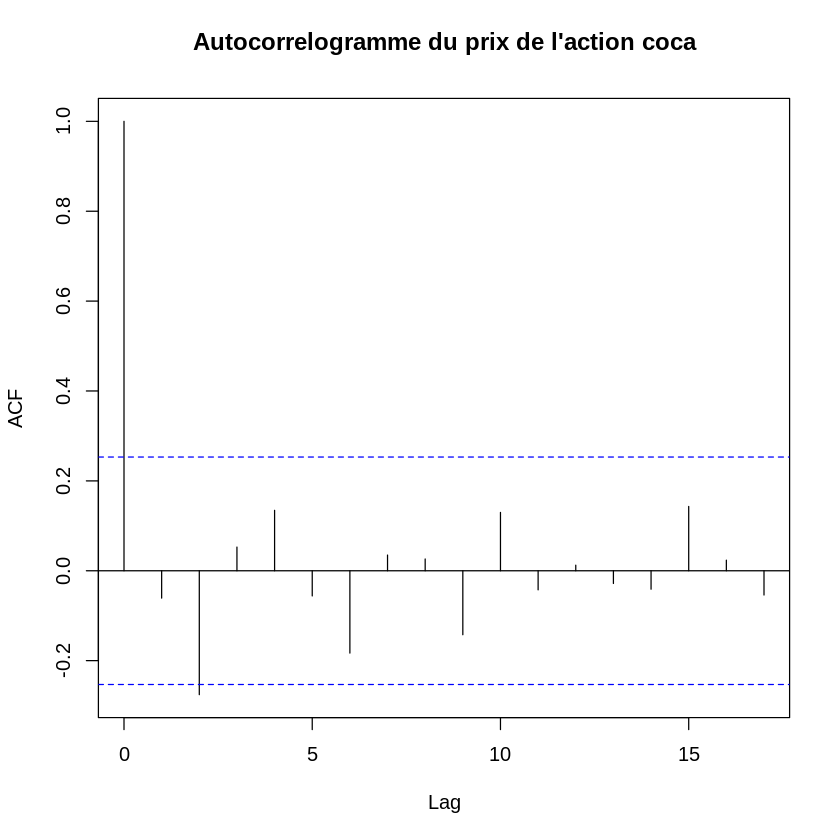

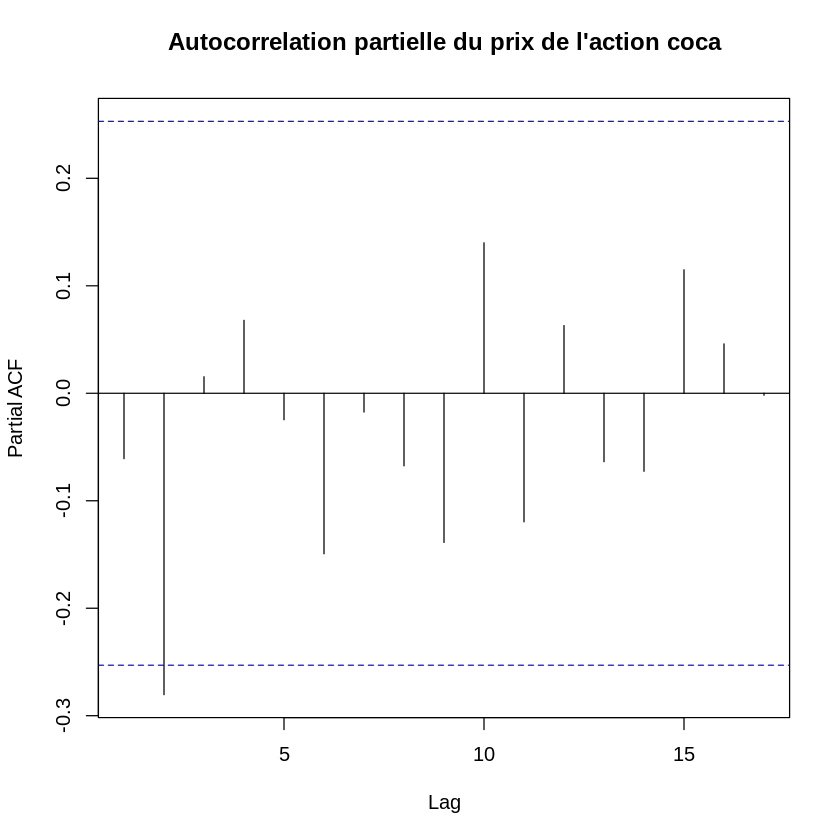

In [ ]:
acf(diff1_prix_coca, main="Autocorrelogramme du prix de l'action coca")
pacf(diff1_prix_coca, main ="Autocorrelation partielle du prix de l'action coca")

D'après les autocorrélogrammes simple et partiel, nous constatons que seul les premiers et troisièmes retards sont significativement différents de 0. Pour l'autocorrélogramme partiel nous avons uniquement le second retard qui est significatif.

Ainsi on pourrait supposer qu'il s'agit ici d'un AR(2) car nous avons les autocorrélations simples qui décroient vers 0.

Nous regardons les critères d'information AIC et BIC pour confirmer notre intuition.

In [ ]:
mataic <- matrix(0,8,8)
matbic <- matrix(0,8,8)

for (p in 0:7){
  for(q in 0:7){
    armapq <- Arima(diff1_prix_coca, order=c(p,0,q), method = 'ML')
    mataic[p+1,q+1] <- armapq$aic
    matbic[p+1,q+1] <- armapq$bic
  }
}

rownames(mataic) <- c('p=0','p=1','p=2','p=3','p=4','p=5','p=6','p=7')
rownames(matbic) <- c('p=0','p=1','p=2','p=3','p=4','p=5','p=6','p=7')
colnames(mataic) <- c('q=0','q=1','q=2','q=3','q=4','q=5','q=6','q=7')
mataic
matbic


,q=0,q=1,q=2,q=3,q=4,q=5,q=6,q=7
p=0,303.6001,305.1112,302.9469,304.9345,306.8685,308.3657,307.1303,308.7270
p=1,305.3770,303.0264,304.9383,306.9291,308.8170,307.4937,308.6875,309.2055
p=2,302.4744,304.4704,305.9418,307.8577,307.7706,309.2960,310.6678,311.1408
p=3,304.4686,306.4503,307.8882,307.3861,307.7039,310.9712,310.2553,308.0958
p=4,306.2631,308.2592,308.3026,308.9729,311.3060,313.3056,311.3988,310.0767
p=5,308.2395,307.2432,308.1464,311.7074,313.3052,314.9523,311.1594,312.4622
p=6,308.9007,310.3699,310.8372,307.6187,308.6137,311.1942,311.9290,313.8550
p=7,310.8503,310.6661,312.6362,309.1078,309.6611,313.1539,313.8344,314.0852


p=0,307.7888,311.3942,311.3242,315.4062,319.4346,323.0261,323.8851,327.5761
p=1,311.6601,311.4037,315.4100,319.4952,323.4775,324.2485,327.5366,330.1490
p=2,310.8518,314.9421,318.5079,322.5181,324.5253,328.1451,331.6113,334.1786
p=3,314.9404,319.0163,322.5486,324.1408,326.5530,331.9147,333.2931,333.2280
p=4,318.8292,322.9196,325.0573,327.8220,332.2494,336.3433,336.5310,337.3032
p=5,322.8999,323.9979,326.9955,332.6508,336.3430,340.0845,338.3859,341.7830
p=6,325.6554,329.2190,331.7806,330.6565,333.7458,338.4207,341.2498,345.2702
p=7,329.6994,331.6095,335.6740,334.2399,336.8876,342.4747,345.2496,347.5947


Ainsi nous voyons bien que le modèle qui minimise le critère AIC est un modèle AR(2).

Maintenant que nous savons que notre série temporelle est un AR(2) nous allons estimer notre modèle. Pour cela nous utilisons la fonction Arima de la library forecast.

In [ ]:
# Estimation d'un  modèle
AR2<-Arima(y = diff1_prix_coca,order=c(2,0,0))
AR2$coef
summary(AR2)

ar1         ar2   intercept 
-0.07758849 -0.27954914  0.07482905

Series: diff1_prix_coca 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2    mean
      -0.0776  -0.2795  0.0748
s.e.   0.1243   0.1233  0.2696

sigma^2 = 8.319:  log likelihood = -147.24
AIC=302.47   AICc=303.2   BIC=310.85

Training set error measures:
                      ME     RMSE      MAE MPE MAPE      MASE        ACF1
Training set -0.01260575 2.811246 2.247607 NaN  Inf 0.6809881 0.001597679

Avec la fonction précedente nous obtenons la valeur de la moyenne et non de la constante. Ainsi nous déterminons la valeur de la constante par le calcul. Nous savons que : $$ c = E(X)(1 - \phi_1 - \phi_2) $$

In [ ]:
c=AR2$coef[3]*(1-AR2$coef[1]-AR2$coef[2])
c

intercept 
0.1015533

Nous testons nos coefficients et leurs significativités.

In [ ]:
coeftest(AR2)


z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)  
ar1       -0.077588   0.124343 -0.6240  0.53264  
ar2       -0.279549   0.123296 -2.2673  0.02337 *
intercept  0.074829   0.269620  0.2775  0.78137  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**Commentaires**

1. On vérifie la significativité de la constante :

$$\left\lbrace\begin{array}{l} H_{0}\,:\,c=0\\
H_{a}\,:\,c \neq 0
\end{array} \right.$$

* La statistique de test $t_{\hat{c}} = \frac{\hat{c}}{\hat{\sigma}_{\hat{c}}} \rightarrow N(0,1)$ sous $H_{0}$ car On dispose de 60 observations.
* Les seuils critiques sont :
*       seuil = 2.57 pour un risque de première espèce égal à 1\%
*       seuil = 1.96 pour un risque de première espèce égal à 5\%

* $t_{\hat{c}}=0,78137<2.57$ : la constante n'est pas significative pour un risque de première espèce de 1 %
* La probabilité critique est supériuer à 1\% pour la constante.

2. On vérifie la significativité celle des coefficients de l'AR(2) :

$$\left\lbrace\begin{array}{l}
H_{0}\,:\,\phi_{i}=0\\
H_{a}\,:\,\phi_{i} \neq 0
\end{array} \right.$$

*    $\vert t_{\hat{\phi}_{2}} \vert > 1,96$  : le coefficient du retard 2 de l'AR est significativement différent de 0 pour un risque de première espèce de 5\%.
*   La probabilité critique pour $\hat{\phi}_{2}$ est inférieure à 5\% : on rejette l'hypothèse nulle de non-significativité pour un risque de première espèce de 5\%.
*   $\vert t_{\hat{\phi}_{1}} \vert=0,624 < 1.96$ : le coefficient du premier retard de l'AR(2) n'est pas significativement différent de 0
*  La probabilité critique de $\hat{\phi}_{1}$ est égale à 53.3 % : ce coefficient n'est pas significatif pour un risque de 5%.



On estime un AR(3) pour vérifier s'il n'est pas nécessaire d'ajouter des retards supplémentaires

In [ ]:
AR3<-Arima(y = diff1_prix_coca,order=c(3,0,0))
AR3$coef
summary(AR3)
coeftest(AR3)

ar1         ar2         ar3   intercept 
-0.07442188 -0.27860916  0.01006754  0.07338192

Series: diff1_prix_coca 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
          ar1      ar2     ar3    mean
      -0.0744  -0.2786  0.0101  0.0734
s.e.   0.1311   0.1239  0.1325  0.2730

sigma^2 = 8.467:  log likelihood = -147.23
AIC=304.47   AICc=305.58   BIC=314.94

Training set error measures:
                      ME     RMSE     MAE MPE MAPE      MASE         ACF1
Training set -0.01166336 2.811109 2.24586 NaN  Inf 0.6804589 -0.001909645


z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)  
ar1       -0.074422   0.131136 -0.5675  0.57036  
ar2       -0.278609   0.123906 -2.2485  0.02454 *
ar3        0.010068   0.132501  0.0760  0.93943  
intercept  0.073382   0.273039  0.2688  0.78811  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Le coefficient 3 n'est pas significatif on garde donc notre AR2.

On estime un ARMA(2,1) pour vérifier s'il n'est pas nécessaire d'ajouter des retards MA supplémentaires

In [ ]:
ARMA<-Arima(y = diff1_prix_coca,order=c(2,0,1))
ARMA$coef
summary(ARMA)
coeftest(ARMA)

ar1         ar2         ma1   intercept 
-0.10051863 -0.28088105  0.02514194  0.07385116

Series: diff1_prix_coca 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
          ar1      ar2     ma1    mean
      -0.1005  -0.2809  0.0251  0.0739
s.e.   0.3810   0.1245  0.3951  0.2719

sigma^2 = 8.467:  log likelihood = -147.24
AIC=304.47   AICc=305.58   BIC=314.94

Training set error measures:
                      ME     RMSE      MAE MPE MAPE     MASE         ACF1
Training set -0.01196038 2.811151 2.246402 NaN  Inf 0.680623 -0.000856227


z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)  
ar1       -0.100519   0.381028 -0.2638  0.79193  
ar2       -0.280881   0.124505 -2.2560  0.02407 *
ma1        0.025142   0.395101  0.0636  0.94926  
intercept  0.073851   0.271887  0.2716  0.78591  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Avec cette estimation nous pouvons voir que l'ajout d'un retard MA n'est pas significatif donc nous concervons notre modèle de départ à savoir un AR(2).

Nous allons donc travailler avec : $$X_t = 0.10 - 0.07759 X_{t-1} -0.2795X_{t-2} + ϵ_t $$

### Test de validation du modèle

#### Analyse des racines

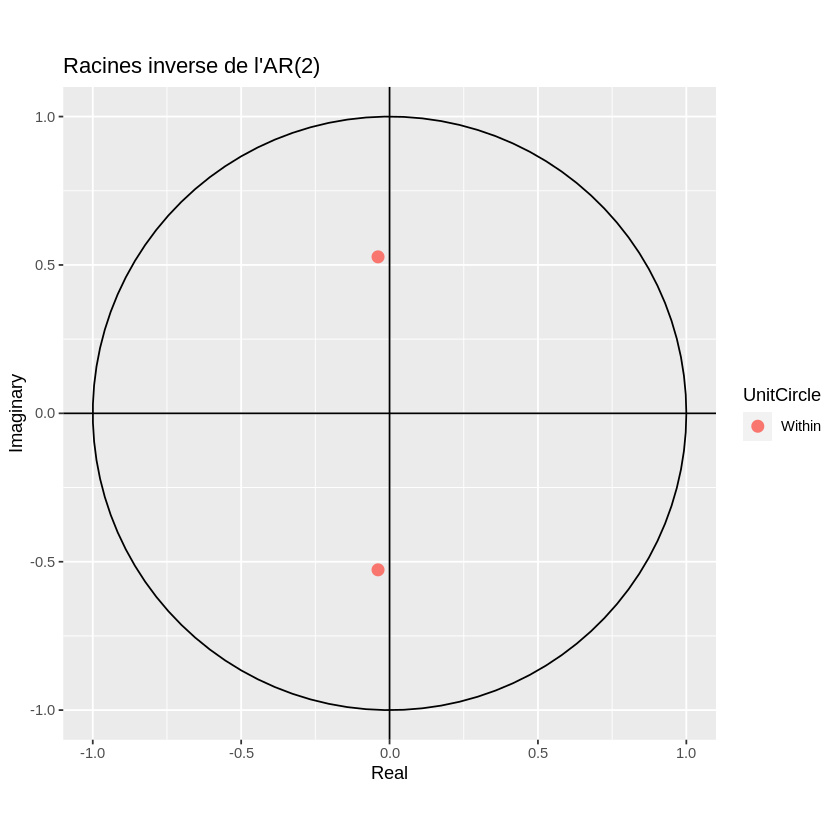

In [ ]:
autoplot(AR2,main="Racines inverse de l\'AR(2)")

On représente les **inverses** des racines dans le cercle unitaire. La condition de stationnarité impose que ces inverses doivent être de module strictement inférieur à 1, c'est-à-dire dans le cercle unitaire. La condition de stationnarité est donc satisfaite.

#### Test de Ljung-Box

On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 10. Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_{0}\,:\,\rho(1)=\rho(2)=\ldots=\rho(10)=0\\
H_{a}\,:\,\exists i\in\left\lbrace 1,\cdots,10 \right\rbrace\,\mathrm{tel\,que}\,\rho(i)\neq 0
\end{array}
\right.
$$


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 5.4324, df = 8, p-value = 0.7105

Model df: 2.   Total lags used: 10



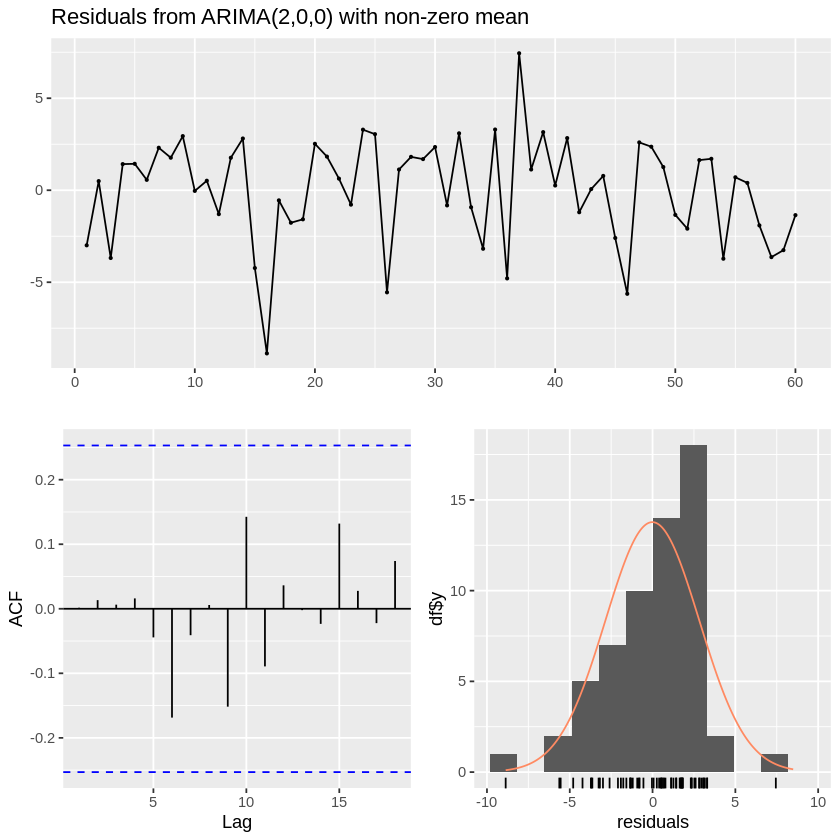

In [ ]:
test_resAR2<-checkresiduals(AR2,lag = 10)

1. L'autocorrélogramme montre que toutes les autocorrélations sont situées dans les bornes de l'intervalle de confiance à 95\% : aucune des autocorrélations n'est significativement différente de 0.

2. La statistique de test de Ljung-Box est égale à $Q*(10) = 5.4324$.
    + Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(10-2) = \chi^{2}(8)$.
    + Les seuils critiques sont donc tirés de la loi $\chi^{2}(8)$ :
        + $\chi^{2}(8)_{0.90}=13.362$ pour un risque de première espèce de 10%
        + $\chi^{2}(8)_{0.95}=15.507$ pour un risque de première espèce de 5%
        + $\chi^{2}(8)_{0.99}=18.168$ pour un risque de première espèce de 1%
    + $Q*(10) = 5.4324$  est inférieure à ces seuils critiques. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus pour un risque de première espèce de 1%.
    + La probabilité critique est égale à $0.7105$. Elle est supérieure aux risques de première espèce habituel (1%, 5% et 10%). On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus.


#### Test de l'hypothèse de normalité des résidus

On représente :

1. l'histogramme des résidus (rectangles gris )
2. l'histogramme d'une loi normale avec la même moyenne et le même écart type que celui des résidu (trait rouge)



In [ ]:
which(AR2$residuals==max(AR2$residuals))

[1] 37

[1] "Skewness des residus : -0.902531"

[1] "kurtosis des residus : 3.487832"

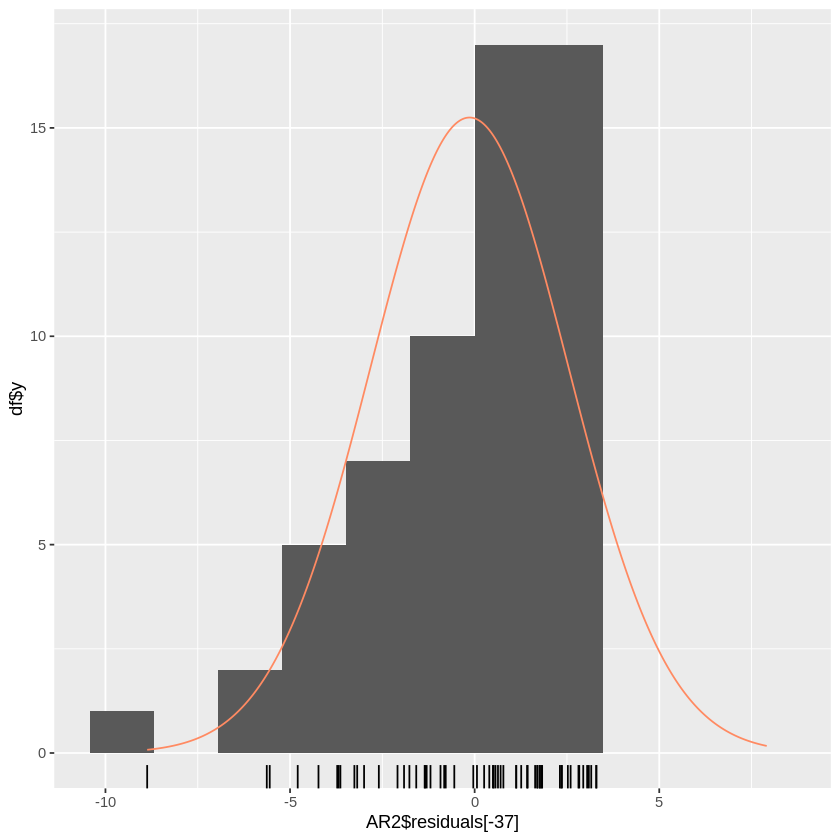

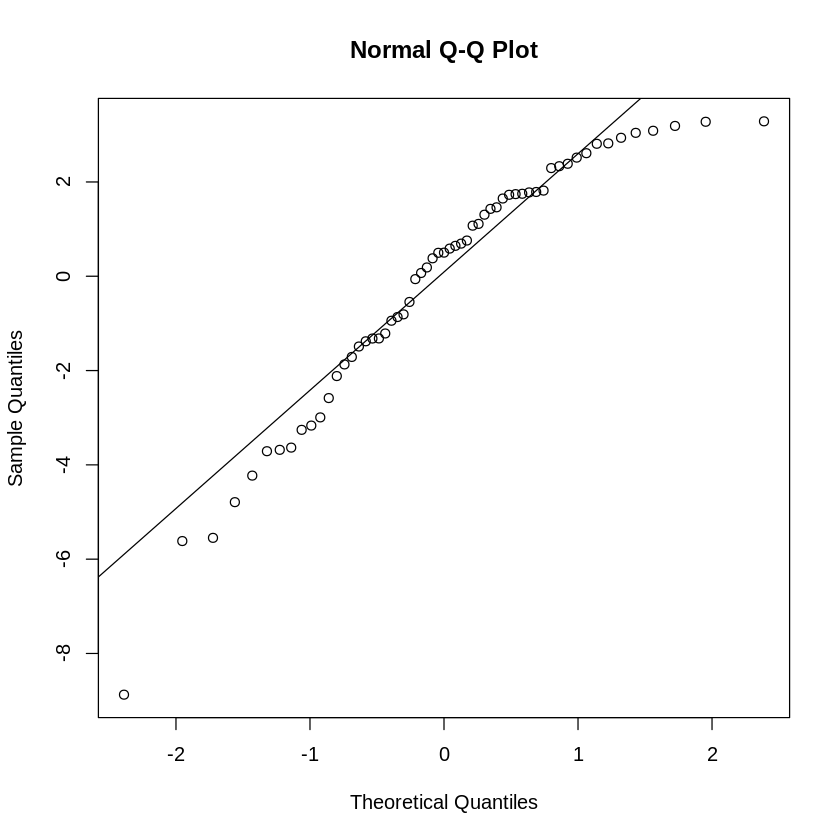

In [ ]:
gghistogram(AR2$residuals[-37], add.normal = TRUE)

sprintf("Skewness des residus : %f",skewness(AR2$residuals[-37]))
sprintf("kurtosis des residus : %f",kurtosis(AR2$residuals[-37]))
qqnorm(AR3$residuals[-37])
qqline(AR3$residuals[-37])

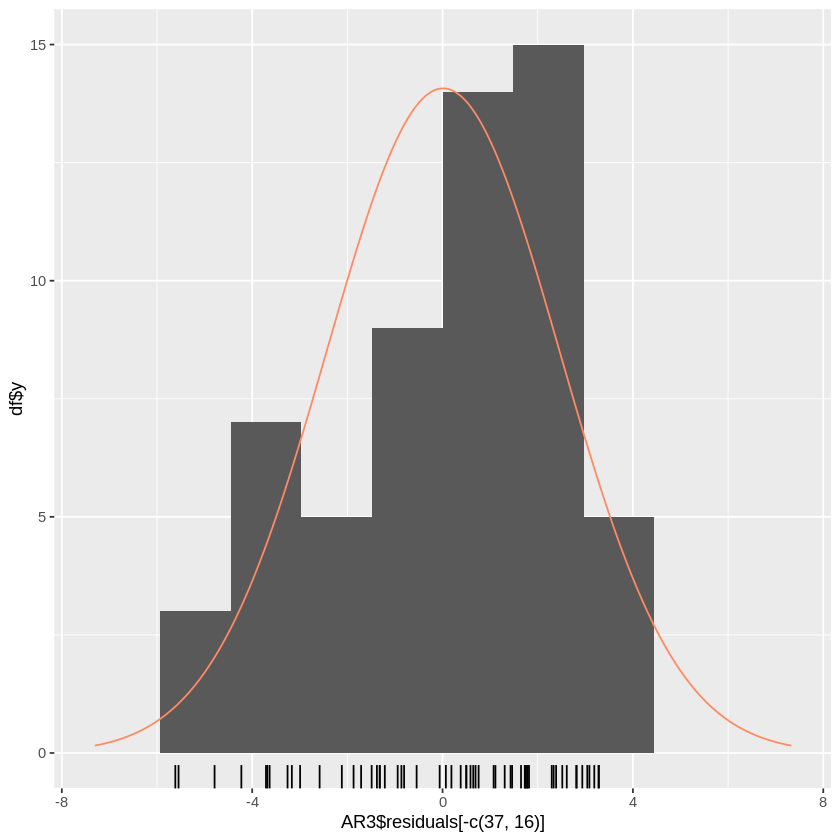

In [ ]:
gghistogram(AR3$residuals[-c(37,16)], add.normal = TRUE)

**Test de l'hypothèse en normalité de Jarque and Bera**

In [ ]:
sprintf("Skewness des residus : %f",skewness(AR3$residuals[-c(37,16)]))
sprintf("kurtosis des residus : %f",kurtosis(AR3$residuals[-c(37,16)]))

[1] "Skewness des residus : -0.594420"

[1] "kurtosis des residus : 2.381650"

* Le skewness estimé est négatif : on a une asymétrie du côté des valeurs négatives.
* Le kurtosis estimé est inférieur à 3 : c'est l'indice d'une loi non gaussienne

In [ ]:
library(tseries)
jarque.bera.test(AR3$residuals)
jarque.bera.test(AR3$residuals[-c(61)])


	Jarque Bera Test

data:  AR3$residuals
X-squared = 4.4368, df = 2, p-value = 0.1088



	Jarque Bera Test

data:  AR3$residuals[-c(61)]
X-squared = 4.4368, df = 2, p-value = 0.1088


Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_ {0}:\,S(X)=0\;et\;K(X)=3\\
H_ {1}:\,S(X)\neq 0\; ou\;K(X)\neq 3
\end{array}
\right.
$$

* La statistique du test de Jarque et Bera est égale à  est JB\_stat = 4.4368.
* Sous $H_{0}$, LB\_stat suit une loi $\chi^{2}(2)$.
* Les seuils critiques sont :
    + $\chi^{2}_{0.90}(2)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(2)=9.21$ pour un risque de première espèce de 1%
    
* JB\_stat = 4.4368 est inférieur aux seuils critiques pour des risques de première espèce de 1%, 5% et 10\% : on accepte l'hypothèse d'une loi normale pour les résidus.
* La probabilité critique est égale à $0.1088$ : on accepte l'hypothèse nulle de loi normale à 10%, 5\% et 1%.


Nos résidus suivent donc une **loi normale centrée réduite.**

### Test de Engle Granger d'absence d'effet ARCH



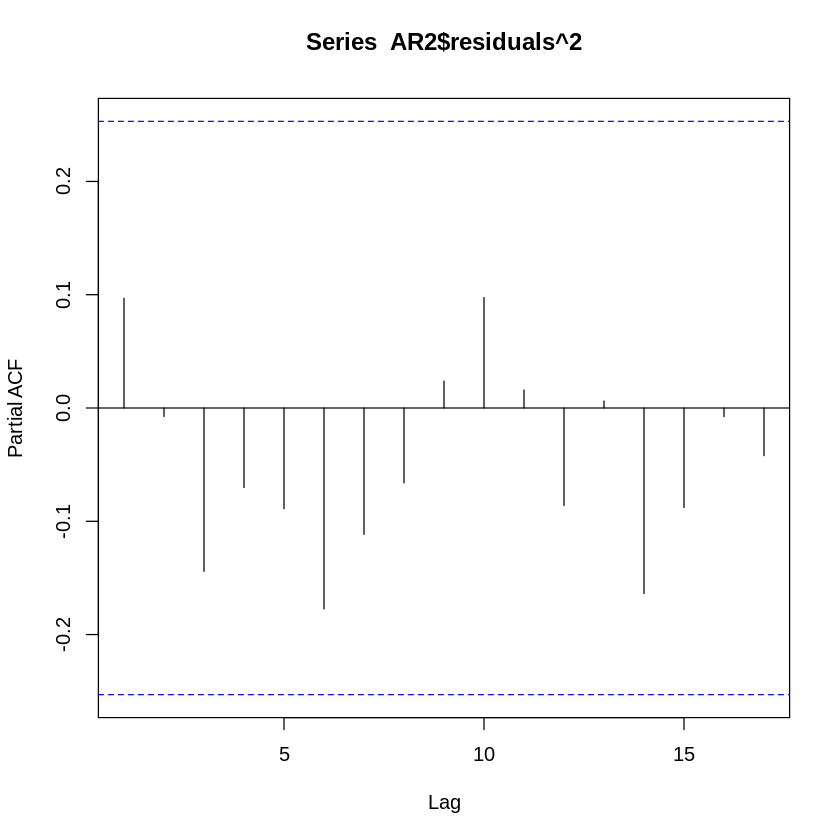

In [ ]:
pacf(AR2$residuals^2)

On utilise la fonction ArchTest de la library FinTS (il existe d'autres fonctions dans les packages ATSA et NortsTest notamment)

On teste l'hypothèse d'absence d'effet ARCH avec quatre retards. La régression estimée est :

$$
\hat{\epsilon}_{t}^{2}= \gamma_{0} + \gamma_{1} \hat{\epsilon}_{t-1}^{2} +\gamma_{2} \hat{\epsilon}_{t-2}^{2} +\gamma_{3} \hat{\epsilon}_{t-3}^{2} +\gamma_{4} \hat{\epsilon}_{t-4}^{2} + v_{t}
$$


Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : \gamma_{1}=...=\gamma_{4}=0 \Rightarrow \,pas\,d'effet\,ARCH\\
H_{a} : \gamma_{1}\neq 0\, ou \,... \gamma_{4} \neq 0 \Rightarrow effet\,ARCH
\end{array}
\right.
$$

Les résultats du test d'absence d'effet ARCH figurent ci-dessous :

In [ ]:
install.packages("FinTS")
library(FinTS)

ArchTest(AR2$residuals,lags= 12 ,demean = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR2$residuals
Chi-squared = 6.6913, df = 12, p-value = 0.8773


* La statistique de test est $ARCH\_LM = 6.6913$.
* Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(12)$. Les seuils critiques sont :
    + $\chi^{2}_{0.90}(12)=3.57$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(12)=3.074$ pour un risque de première espèce de 5%
*  ARCH\_LM = 6.6913 est supérieure aux seuils critiques : on ne rejette l'hypothèse nulle d'absence d'effet ARCH pour les résidus pour les risques de première espèce habituel (5% et 10%)
*  La probabilité critique est égale à $0.8773$ : on accepte l'hypothèse nulle d'absence d'effet ARCH.

Ce résultat est en adéquation avec notre hypothèse de normalité des résidus. En effet, la "non-normalité" est engendrée par des valeurs extremes des résidus ou alors par la présence d'effet ARCH.

L'ensemble des critères de validations du modèle sont respectés par notre processus. En effet, ce dernier est stationnaire, avec des résidus homoscédastique et non auto-corrélés.

On peut donc conclure que notre modèle est retenu et que donc processus suit un AR(2) : $$ X_t \approx AR(2)$$

## Prévisions

### Calcul des prévision et représentation graphique


On calcule les prévisions pour l'année 2023 (soit à l'horizon h=3) ainsi que leur intervalle de confinance à 95 %.

   Point Forecast     Lo 95    Hi 95
61     0.73613014 -4.916951 6.389211
62     0.04443809 -5.625633 5.714509
63    -0.10767911 -5.984812 5.769454

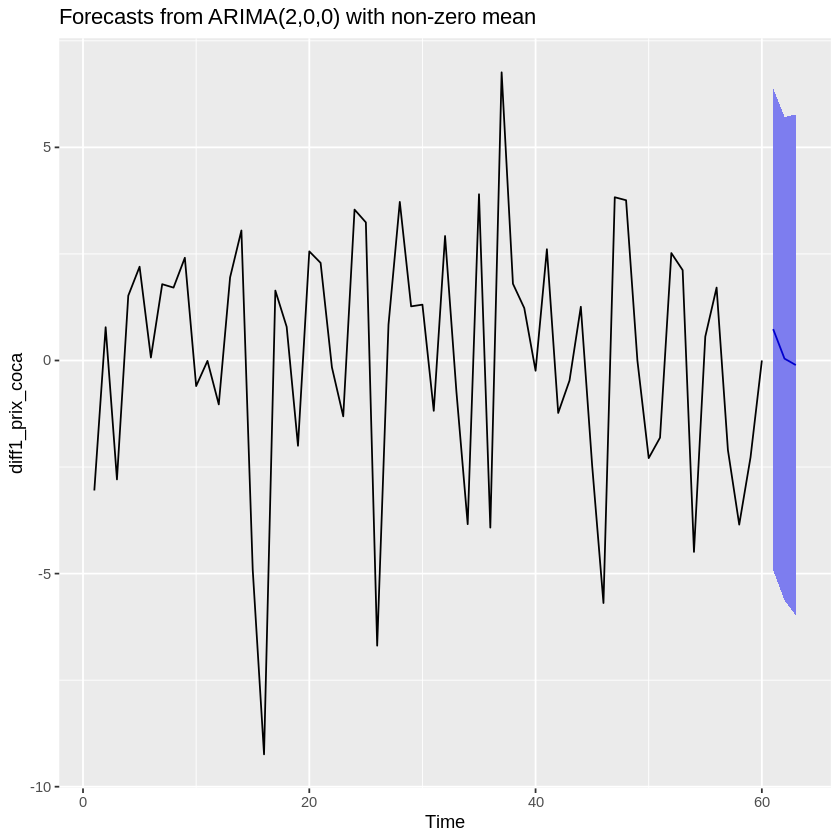

In [ ]:
library(forecast)
forecast_AR2<-forecast(AR2,h=3,level=95)
forecast_AR2
autoplot(forecast_AR2)

$$
\left\lbrace
\begin{array}{l}
Diff\_Prix\_coca_{t} = 0.074829+\hat{u}_{t}\\
\hat{u}_{t}= -0.07759\times \hat{u}_{t-1}-0.2795\times \hat{u}_{t-2}+\hat{\epsilon}_{t}
\end{array}
\right.
$$

$0.074829=E(Diff\_Prix\_coca_{t})$ et $\hat{u}_{t} = Diff\_Prix\_coca_{t}- 0.074829$ est le prix du coca corrigé de sa moyenne.

$$
\begin{aligned}
\Rightarrow Diff\_Prix\_coca_{t} - 0.074829 &= -0.07759\times(Diff\_Prix\_coca_{t-1} - 0.074829)-0.2795\times (Diff\_Prix\_coca_{t-2} - 0.074829)+\hat{\epsilon}_{t}\\
\Rightarrow Diff\_Prix\_coca_{t} & = (1 + 0.07759 + 0.2795)\times 0.074829 - 0.07759\times Diff\_Prix\_coca_{t-1}-0.2795\times Diff\_Prix\_coca_{t-2} +\hat{\epsilon}_{t}\\
\Rightarrow Diff\_Prix\_coca_{t} &= 0.1015 -0.07759\times Diff\_Prix\_coca_{t-1}-0.2795\times Diff\_Prix\_coca_{t-2}+\hat{\epsilon}_{t}
\end{aligned}
$$

**Calcul de la prévision pour h=1**

$$
\begin{aligned}
Diff\_Prix\_coca_{h=1}^{a} &= 0.1015 -0.07759\times Diff\_Prix\_coca_{h=0}-0.2795\times Diff\_Prix\_coca_{h=-1}\\
\Rightarrow Diff\_Prix\_coca_{h=1}^{a}&= 0.7361 \\
\Rightarrow Prix\_coca_{h=1}^{a}&= 0.7361 + 53.709999 = 54.446099
\end{aligned}
$$

**Calcul de la prévision pour h=2**

$$
\begin{aligned}
Diff\_Prix\_coca_{h=2}^{a} &= 0.1015 -0.07759\times Diff\_Prix\_coca_{h=1}-0.2795\times Diff\_Prix\_coca_{h=0}\\
\Rightarrow Diff\_Prix\_coca_{h=2}^{a}&= 0.04444 \\
\Rightarrow Prix\_coca_{h=1}^{a}&=0.04444 + 54.446099 = 54.490539
\end{aligned}
$$

**Calcul de la prévision pour h=3**

$$
\begin{aligned}
Diff\_Prix\_coca_{h=3}^{a} &= 0.1015 -0.07759\times Diff\_Prix\_coca_{h=2}-0.2795\times Diff\_Prix\_coca_{h=1}\\
\Rightarrow Diff\_Prix\_coca_{h=3}^{a}&= -0.1077 \\
\Rightarrow Prix\_coca_{h=1}^{a}&=-0.1077 + 54.490539 = 54.382839
\end{aligned}
$$

# Modélisation Multivariée


Installation de packages


In [ ]:
install.packages("vars")
install.packages("lpirfs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘iterators’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘foreach’, ‘gridExtra’, ‘plm’




In [ ]:
library(vars)
library(lpirfs)

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



In [ ]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




On considère maintenant le vecteur $X_t$ de toutes les séries stationnarisées.

In [ ]:
diff1_prix_coca_ts <- ts(diff1_prix_coca)
diff1_prix_sucre_ts <- ts(diff1_prix_sucre)
endogene <- ts.intersect(diff1_prix_coca_ts, diff1_prix_sucre_ts)
endogene

,diff1_prix_coca_ts,diff1_prix_sucre_ts
1,-3.050004,-0.35
2,0.780003,-0.81
3,-2.790001,0.70
4,1.520001,0.05
5,2.200000,-0.25
6,0.070000,-0.19
7,1.789997,-0.24
8,1.710003,0.52
9,2.410000,-0.41
10,-0.600002,-1.07


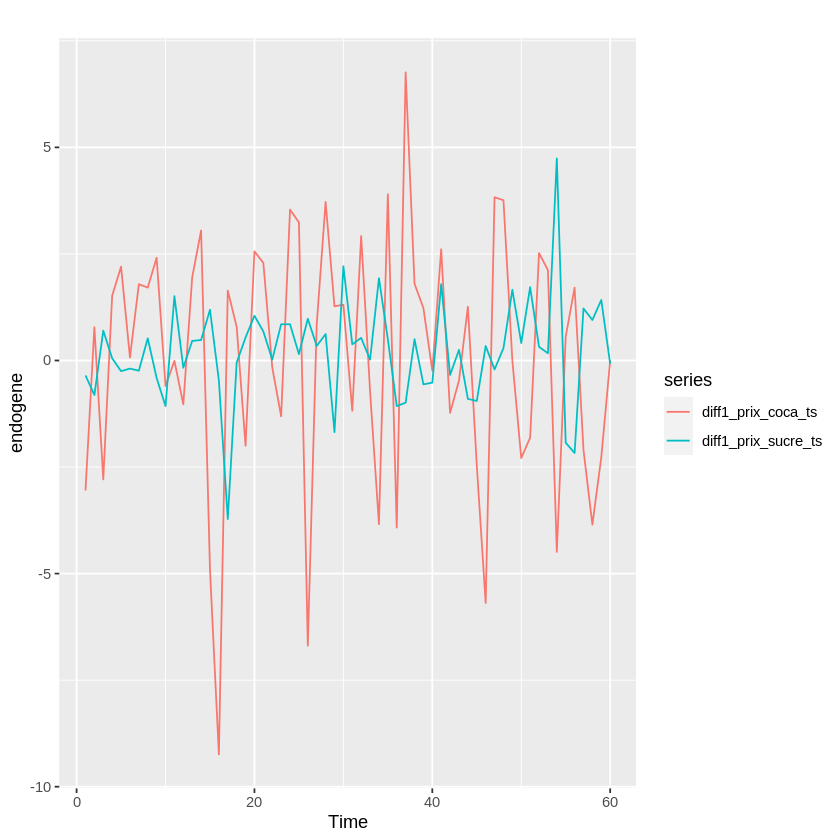

In [ ]:
autoplot(endogene)


Nous pouvons observer graphiquement que les deux variables n'évoluent pas forcément ensemble.

## Détermination du modèle VAR

Détermination du nombre optimal de retards



In [ ]:
pselect<-VARselect(y=endogene,lag.max=8,type=c("const"))
pselect$selection


AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      1      1      2

On chosit de prendre p =  selon les critères de selection
On estime donc un VAR avec deux retards et une constante


In [ ]:
var.2lag <-VAR(y = endogene,type="const",lag.max = 2)
summary(var.2lag)


VAR Estimation Results:
Endogenous variables: diff1_prix_coca_ts, diff1_prix_sucre_ts 
Deterministic variables: const 
Sample size: 58 
Log Likelihood: -230.046 
Roots of the characteristic polynomial:
0.5851 0.5851 0.2775 0.2775
Call:
VAR(y = endogene, type = "const", lag.max = 2)


Estimation results for equation diff1_prix_coca_ts: 
diff1_prix_coca_ts = diff1_prix_coca_ts.l1 + diff1_prix_sucre_ts.l1 + diff1_prix_coca_ts.l2 + diff1_prix_sucre_ts.l2 + const 

                       Estimate Std. Error t value Pr(>|t|)  
diff1_prix_coca_ts.l1  -0.07077    0.13510  -0.524   0.6026  
diff1_prix_sucre_ts.l1  0.02270    0.33913   0.067   0.9469  
diff1_prix_coca_ts.l2  -0.27477    0.13688  -2.007   0.0498 *
diff1_prix_sucre_ts.l2  0.12574    0.33204   0.379   0.7064  
const                   0.09933    0.40395   0.246   0.8067  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 2.958 on 53 degrees of freedom
Multiple R-Squared: 0.0867,	Adjusted 

 Les coefficients pour les retards de chaque variable indiquent à quel point les prix passés de l'une influencent les prix actuels de l'autre. Les coefficients significatifs (comme indiqué par les codes de significativité) suggèrent qu'il existe une relation linéaire et peut-être causale entre les séries temporelles des deux produits. Cela pourrait refléter, par exemple, des relations de marché où les prix de ces biens sont liés par des facteurs de demande ou de substitution.Cependant, le modèle ne montre pas de significativité globale très forte, comme le suggère la valeur F élevée et la valeur p associée, ce qui indique une prudence dans l'interprétation des résultats.On constate que les 2 constantes ne sont pas significatives comme nous l'avons vu dans la question 4. De plus on voit le liens entre ces le sucre et le coca car le prix du coca en t-2 influence le prix du sucre 2 mois plus tard.



On étudie la stationnarité du VAR. La fonction roots renvoie les module des inverses des racines du polynôme caractéristique.

In [ ]:
roots(var.2lag)

[1] 0.5851251 0.5851251 0.2775466 0.2775466

Les inverses des racines sont de module strictement inférieur à 1 : la condition de stationnarité est donc satisfaite.

En effet, une combinaison linéaire de série stationnaire est stationnaire.

* **Liste des matrices des coefficients estimés du VAR**

In [ ]:
A<-Acoef(var.2lag)
A

,diff1_prix_coca_ts.l1,diff1_prix_sucre_ts.l1
diff1_prix_coca_ts,-0.07076720,0.0226968
diff1_prix_sucre_ts,0.08200699,-0.1031162
,diff1_prix_coca_ts.l2,diff1_prix_sucre_ts.l2
diff1_prix_coca_ts,-0.2747718,0.1257404
diff1_prix_sucre_ts,0.1074534,-0.1451562


## Test de causalité au sens de Granger

Regardons les relations de causalité entre les variables

On vérifie la significativité du coefficient de $diff1\_prix\_sucre$ dans l'équation de $diff1\_prix\_coca$. Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_{0} :a_{12}^{1}= a_{12}^{2}=0\Rightarrow\,diff\_prix\_sucre\,\mathrm{ne\,cause\,pas}\,diff1\_prix\_coca\\
H_{a} :\exists \:i \;\;tel \;\;que \;\;a_{12}^{i}\neq 0    \Rightarrow\,diff1\_prix\_sucre\,\mathrm{cause}\,diff1\_prix\_coca
\end{array}
\right.
$$

In [ ]:
causality(var.2lag,cause=c('diff1_prix_sucre_ts'))

$Granger

	Granger causality H0: diff1_prix_sucre_ts do not Granger-cause
	diff1_prix_coca_ts

data:  VAR object var.2lag
F-Test = 0.073124, df1 = 2, df2 = 106, p-value = 0.9295


$Instant

	H0: No instantaneous causality between: diff1_prix_sucre_ts and
	diff1_prix_coca_ts

data:  VAR object var.2lag
Chi-squared = 1.2313, df = 1, p-value = 0.2672



Les seuils critiques sont tirés d'une loi $F(2,56)$ :

| $\alpha$                  | 5\%  | 1\% |
|---------------------------|------|------|
| $f_{1-\alpha}(1,+\infty)$ | 3.15 | 4.98 |

La statistique de test égale à 0.073124 est inférieur au seuil critique pour $\alpha=1\%$. On ne rejette donc pas  l'hypothèse nulle d'absence de causalité du taux de croissance de la consommation sur le taux de croissance du revenu. La probabilité critique du test est égale à 0,9295\% ce qui amène aux mêmes conclusions.  

On vérifie la significativité du coefficient de $diff1\_prix\_coca$ dans l'équation de $diff1\_prix\_sucre$  . Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_{0} :a_{12}^{1}= a_{12}^{2}=0\Rightarrow\,diff1\_prix\_coca\,\mathrm{ne\,cause\,pas}\,diff1\_prix\_sucre\\
H_{a} :\exists \:i \;\;tel \;\;que \;\;a_{12}^{i}\neq 0    \Rightarrow\,diff1\_prix\_coca\,\mathrm{cause}\,diff1\_prix\_sucre
\end{array}
\right.
$$

In [ ]:
causality(var.2lag,cause=c('diff1_prix_coca_ts'))

$Granger

	Granger causality H0: diff1_prix_coca_ts do not Granger-cause
	diff1_prix_sucre_ts

data:  VAR object var.2lag
F-Test = 3.1514, df1 = 2, df2 = 106, p-value = 0.04683


$Instant

	H0: No instantaneous causality between: diff1_prix_coca_ts and
	diff1_prix_sucre_ts

data:  VAR object var.2lag
Chi-squared = 1.2313, df = 1, p-value = 0.2672



Les seuils critiques sont tirés d'une loi $F(2,56)$ :

| $\alpha$                  | 5\%  | 1\% |
|---------------------------|------|------|
| $f_{1-\alpha}(1,+\infty)$ | 3.15 | 4.98 |

La statistique de test égale à 3.1514 est supériur au seuil critique pour $\alpha=1\%$. On rejette donc l'hypothèse nulle d'absence de causalité du taux de croissance de la consommation sur le taux de croissance du revenu. La probabilité critique du test est égale à 0,04683\% ce qui amène aux mêmes conclusions.  

Conclusion

On observe que le prix du coca influence le prix du sucre. La causalité s'exerce dans un seul sens, nous n'avons pas d'effet feedback. A priori nous devions obtenir le résultat inverse, cela est peut-être dû à la temporalité qui est mensuelle, ce qui peut être court pour observer cette influence.

##Analyse impulsion-réponse des chocs sur les différentes variables

### Méthode des VAR

Les chocs structurels sont déterminés par la méthode de Cholesky avec l'ordre $(diff1\_prix\_coca_{t}, diff1\_prix\_sucre_{t},)'$.

En effet, lors du test de causalité à la Granger nous avions $$ F_{diff1\_prix\_coca_{t}} = 3.1514 $$

$$F_{diff1\_prix\_sucre_{t}} = 0.073124$$

L'ordre des variables dans le dataframe correspond bien à celui choisi pour la décomposition de Cholesky.

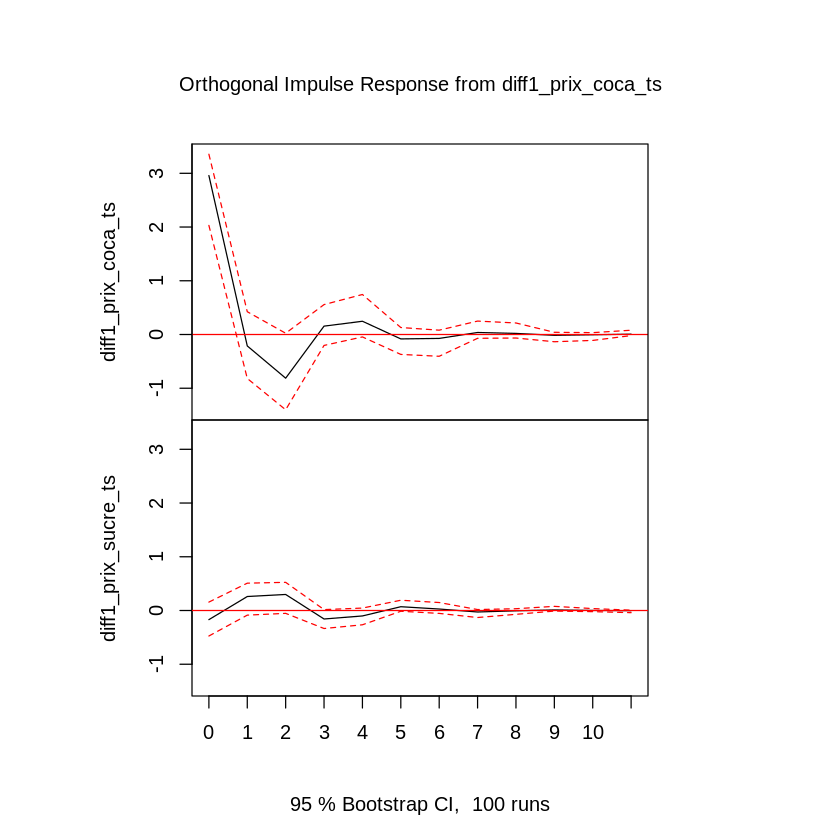

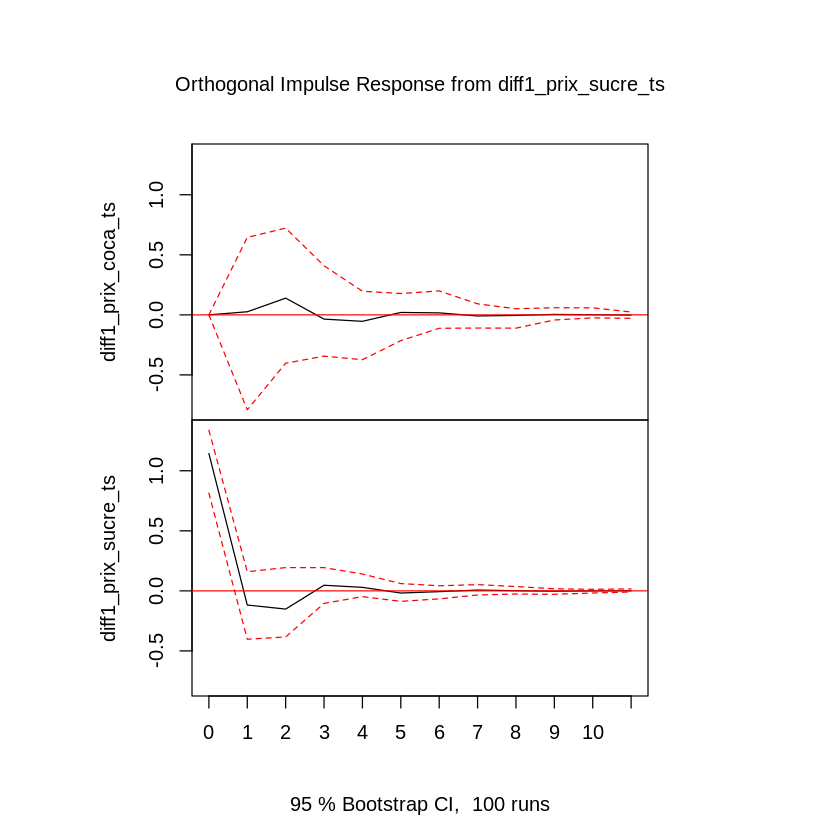

In [ ]:
irf_VAR<-irf(var.2lag,n.ahead = 11,ortho = TRUE,ci=0.95)
plot(irf_VAR)

Le 1er graphique montre la réponse de la différence de prix du coca à un choc unitaire à lui-même.Il y a tout d'abord un impact positif puis, après l'impulsion initiale, la réponse chute rapidement, elle n'est plus significative au bout d'un mois . Cela suggère que le choc a un effet temporaire et que le système revient à l'équilibre assez rapidement.
Dans le deuxième graphique, on observe l'impact de ce même choc sur le prix du sucre. Il y a une réaction instantanée mais qui n'est pas significative dès le départ, le choc est donc logiquement temporaire.Le 3 eme graphique montre la réponse de la différence de prix du coca à un choc unitaire dans la différence de prix du sucre. Il y a une légère réaction positive au bout d'un mois mais qui n'est pas siginificative, le choc est donc aussi temporaire.
Le dernier graphique montre la réponse de la différence de prix du sucre à un choc unitaire à lui-même. La réponse est négative et oscille avant de se stabiliser, elle n'est plus significative au bout d'un mois. Cela indique que le système revient à son niveau initial après un certain temps, le choc est donc temporaire.


### Estimation des fonctions impulsion réponse par la méthodes des projection locales

Nous estimons les projections locales avec un nombre de retards égal à 2 pour toutes horizons et toutes les variables. Chaque choc est l'égal à l'écart type du choc structurel correspondant.

On convertit tout d'abord la variable endogène en data frame.


In [ ]:

endogene_df1 <- as.data.frame(endogene)


In [ ]:
irf_LP_4l <-lp_lin(endog_data = endogene_df1,
                     lags_endog_lin = 2,
                     trend = 0,
                     shock_type = 0,
                     confint=1.96,
                     hor=12)

[[1]]
NULL


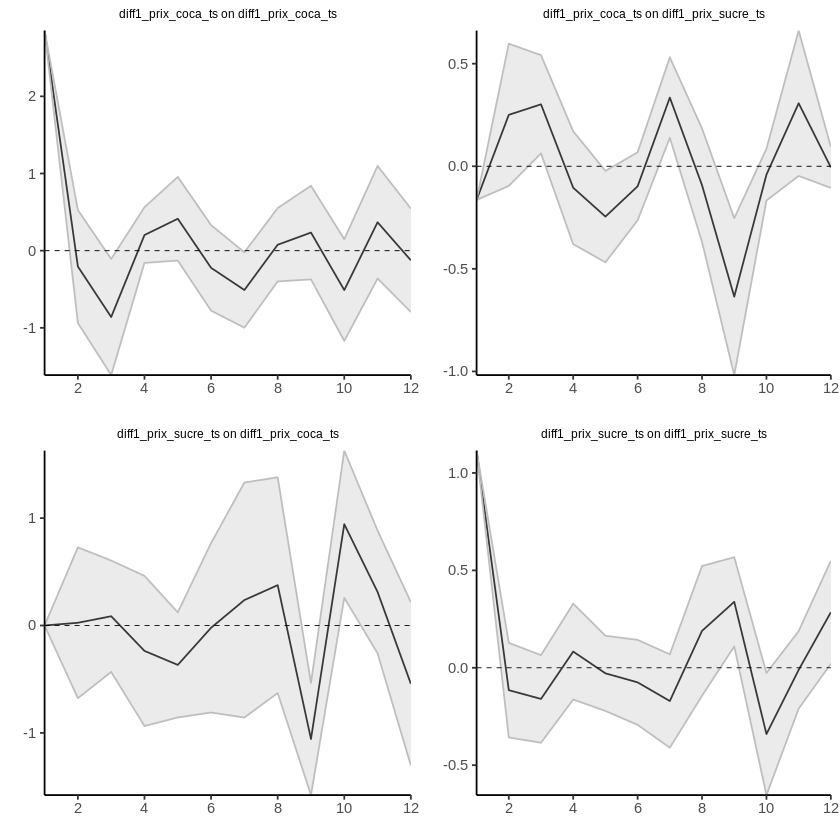

In [ ]:
plot(irf_LP_4l)

A l'aide de cette nouvelle estimation, nous observons des résulats simailaires,seul les échelles différents, mais les conclusions sur la temporalité, la significativité, et sur le signe de l'impact sont identiques.

L'étude de ses réponses montre que notre spécification est le meilleur modèle à estimer avec nos données.


##Test de cointégration de Johansen

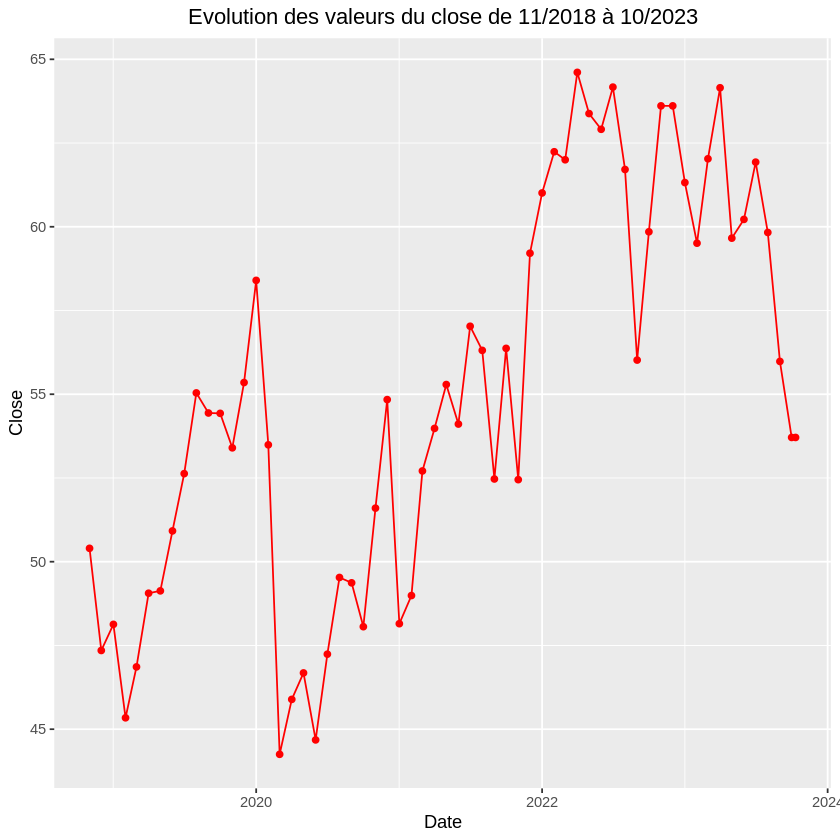

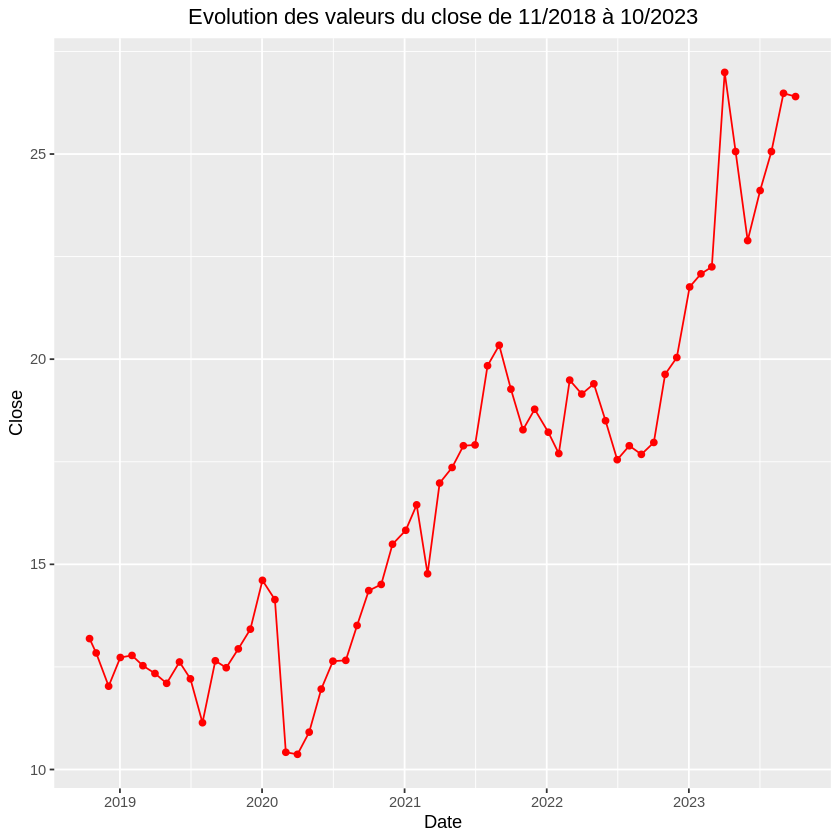

In [ ]:
p_coca<-ggplot(data=df_coca,aes(x=Dates_coca,y=Close))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Close')+ggtitle('Evolution des valeurs du close de 11/2018 à 10/2023')+theme(plot.title = element_text(hjust = 0.5))
p_coca
p_sucre<-ggplot(data=df_sucre,aes(x=Dates_sucre,y=prix_sucre))+geom_point(color='red')+geom_line(color='red')+xlab('Date')+ylab('Close')+ggtitle('Evolution des valeurs du close de 11/2018 à 10/2023')+theme(plot.title = element_text(hjust = 0.5))
p_sucre

In [ ]:
df_sucre_coca <- data.frame(colonne1 =prix_action_coca , colonne2 = prix_sucre)


In [ ]:
sucre_coca.vecm<-ca.jo(df_sucre_coca,ecdet = "none",spec = "transitory",type = 'trace',K=2)
summary(sucre_coca.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.1059723983 0.0008451809

Values of teststatistic and critical values of test:

         test 10pct  5pct  1pct
r <= 1 | 0.05  6.50  8.18 11.65
r = 0  | 6.66 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            colonne1.l1 colonne2.l1
colonne1.l1   1.0000000    1.000000
colonne2.l1  -0.7474309   -4.173595

Weights W:
(This is the loading matrix)

           colonne1.l1 colonne2.l1
colonne1.d -0.22469052 0.002209472
colonne2.d  0.05231383 0.002121638


On commence par l'hypothèse :
$$\left\lbrace
\begin{array}{l}
H_{0}(0) : r =rang(\Pi)\leq 0\\
H_{a}(0) : r =rang(\Pi)> 0
\end{array}
\right.$$
La statistique du test de la trace est :
$$
Q(0)= -T\sum_{i=1}^{2} ln(1-\hat{\lambda}_{i})=6.66
$$
Le seuil de rejet pour un risque de première espèce de 5 \% est égal à  17.95. On a donc $Q(0)=6.66<17.95$  : on ne rejette donc pas l'hypothèse nulle $H_{0}(0) : r =rang(\Pi)\leq 0$ que le nombre de relation de cointégration est égal à 0 pour un risque de première espèce $\alpha = 5\%$.Nous concluons qu'il n'y a pas de relation de cointégration entre le prix du sucre et le cours de l'action coca cola.


L'absence de cointégration suggère que les deux séries temporelles évoluent de manière indépendante et qu'il n'y a pas de lien à long terme entre elles. Cela peut être interprété comme une absence de relation économique significative ou de lien de long terme entre les variables étudiées.

La longueur de notre échantillon temporel peut également influencer les résultats. Un échantillon trop court peut conduire à des tests de cointégration moins fiables.

 Il est possible que des variables importantes aient été omises dans notre modèle.Ici nous regardions une simple relation entre le cours du sucre (matière première) et celui de l'action "The Coca-Cola Company" qui bien sur est reputé pour l'ensemble de ses sodas et donc l'utilisation de sucre.

##Conclusion

Au fil de ce projet nous avons pu étudier les différents liens entre la serie temporrelle des valeurs close de l'action "The Coca-Cola Company" et celles du cours du sucre. Si au départ tout laissait penser à une relation entre ces deux séries nous sommes arrivés aux conclusion que le cours de l'action "The Coca-Cola Company" influence le cours du sucre avec un retard de deux mois. Ce résultat nous semble économiquement un peu alambiqué. Toutefois rappelons que nous avons uniquement des séries mensuelles sur une période courte pour affirmer un tel lien.
Nous pouvons emmettre l'hypothèse que la firme "The Coca-Cola Company" étant fortement dépendante pour son coût de production du prix du sucre, qu'elle se couvre contre les fortes fluctuations du prix de cette matière première en achetant des options d'achat à un prix fixe du sucre sur quelques années.L'impact d'une variation du sucre est donc moindre sur des périodes mensuelles.